# Audio Process
This notebooks needs the podcastmix subset to be in the same directory of this notebook. If you run all the cells from FinalProject_dataset_creation notebook the dataset should already be in the required location and you skip the cell below and go directly to the "!pip install requirements" cell. However, if you wanted to save some time and directly download the dataset, without running the FinalProject_dataset_creation notebook, you must run the cell below:

# Install required packages

In [1]:
!pip install pytorch-lightning
!pip install asteroid
!pip install ffmpeg
!pip install torchaudio

  Using cached https://files.pythonhosted.org/packages/7b/39/ec22cf5675473b7ea496e5fd64df49dc3122f1cfe3646d72c84f0e7fe74a/pytorch-lightning-0.5.3.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/9e/29/bbf3414ba3d03cf1f8d8516e56d69e44ec0ad3fc79a3713b1c6809070e7d/scikit_learn-0.20.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dc/88/d3213e2f3492daf09d8b41631ad6899f56db17ce83ea9c8a579902bafe5e/tqdm-4.35.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/90/59eec88c0b2ac9e47fe135959007acb93a3cc9f7146366e11fecf718dd15/twine-1.13.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1f/c7/198496417c9c2f6226616cff7dedf2115a4f4d0276613bab842ec8ac1e23/numpy-1.16.4-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/46/ca/306bb933a68b888ab1c20ede0342506b85857635f04fb55a56e53065579b/torch-1.4.0-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https:

# Analize data

## Speaker dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [2]:
train_data = pd.read_csv('podcastmix/podcastmix-synth/metadata/train/speech.csv')
train_data['subset'] = 'train'
val_data = pd.read_csv('podcastmix/podcastmix-synth/metadata/val/speech.csv')
val_data['subset'] = 'val'
test_data = pd.read_csv('podcastmix/podcastmix-synth/metadata/test/speech.csv')
test_data['subset'] = 'test'
data = pd.concat([train_data, val_data, test_data], ignore_index = True)
data.head()

,speech_ID,speaker_id,speaker_age,speaker_gender,speaker_accent,speech_path,length,subset
0,p298_234_mic1,p298,19,M,Irish,podcastmix/podcastmix-synth/train/speech/p298_...,199551,train
1,p298_020_mic1,p298,19,M,Irish,podcastmix/podcastmix-synth/train/speech/p298_...,208892,train
2,p298_365_mic1,p298,19,M,Irish,podcastmix/podcastmix-synth/train/speech/p298_...,163744,train
3,p298_110_mic1,p298,19,M,Irish,podcastmix/podcastmix-synth/train/speech/p298_...,139362,train
4,p298_211_mic1,p298,19,M,Irish,podcastmix/podcastmix-synth/train/speech/p298_...,194040,train


In [3]:
val_data

,speech_ID,speaker_id,speaker_age,speaker_gender,speaker_accent,speech_path,length,subset
0,p228_167_mic1,p228,22,F,English,podcastmix/podcastmix-synth/val/speech/p228_16...,186991,val
1,p228_275_mic1,p228,22,F,English,podcastmix/podcastmix-synth/val/speech/p228_27...,118595,val
2,p228_331_mic1,p228,22,F,English,podcastmix/podcastmix-synth/val/speech/p228_33...,99130,val
3,p228_288_mic1,p228,22,F,English,podcastmix/podcastmix-synth/val/speech/p228_28...,141405,val
4,p228_123_mic1,p228,22,F,English,podcastmix/podcastmix-synth/val/speech/p228_12...,124362,val
...,...,...,...,...,...,...,...,...
4502,p376_124_mic1,p376,22,M,Indian,podcastmix/podcastmix-synth/val/speech/p376_12...,133795,val
4503,p376_120_mic1,p376,22,M,Indian,podcastmix/podcastmix-synth/val/speech/p376_12...,117496,val
4504,p376_232_mic1,p376,22,M,Indian,podcastmix/podcastmix-synth/val/speech/p376_23...,92141,val
4505,p376_318_mic1,p376,22,M,Indian,podcastmix/podcastmix-synth/val/speech/p376_31...,112434,val


In [4]:
speakers_dict = {}
for speaker_id in val_data.speaker_id.unique():
    speakers_dict[speaker_id] = val_data.loc[
        val_data['speaker_id'] == speaker_id
    ]

In [5]:
speakers_dict
import random

In [6]:
list_of_speakers = list(speakers_dict.keys())
list_of_speakers.remove('p330')
non_speaker_id = random.sample(list_of_speakers, 1)[0]

ValueError: list.remove(x): x not in list

In [7]:
non_speaker_id

NameError: name 'non_speaker_id' is not defined

In [8]:
data.groupby("subset").mean()

,speaker_age,length
subset,,
test,22.092708,142846.089373
train,22.681918,148306.386319
val,23.148214,156838.304637


In [9]:
data.groupby("subset").std()

,speaker_age,length
subset,,
test,2.223169,51873.323341
train,3.086560,52443.353473
val,2.238795,56578.046693


In [10]:
data.groupby("speaker_accent").count()

,speech_ID,speaker_id,speaker_age,speaker_gender,speech_path,length,subset
speaker_accent,,,,,,,
American,8575,8575,8575,8575,8575,8575,8575
Australian,823,823,823,823,823,823,823
British,398,398,398,398,398,398,398
Canadian,3151,3151,3151,3151,3151,3151,3151
English,13636,13636,13636,13636,13636,13636,13636
Indian,1164,1164,1164,1164,1164,1164,1164
Irish,3623,3623,3623,3623,3623,3623,3623
NewZealand,422,422,422,422,422,422,422
NorthernIrish,2580,2580,2580,2580,2580,2580,2580


In [11]:
data.groupby("speaker_gender").count()

,speech_ID,speaker_id,speaker_age,speaker_accent,speech_path,length,subset
speaker_gender,,,,,,,
F,25619,25619,25619,25619,25619,25619,25619
M,18836,18836,18836,18836,18836,18836,18836


In [12]:
train_data.groupby("speaker_gender").count()

,speech_ID,speaker_id,speaker_age,speaker_accent,speech_path,length,subset
speaker_gender,,,,,,,
F,21948,21948,21948,21948,21948,21948,21948
M,13502,13502,13502,13502,13502,13502,13502


In [13]:
print("Train set")
print("F", train_data.groupby("speaker_gender").count().iloc(0)[0][0])
print("M", train_data.groupby("speaker_gender").count().iloc(0)[1][0])

Train set
F 21948
M 13502


In [14]:
print("Test set")
print("F", test_data.groupby("speaker_gender").count().iloc(0)[0][0])
print("M", test_data.groupby("speaker_gender").count().iloc(0)[1][0])

Test set
F 1234
M 3264


In [15]:
print("Val set")
print("F", val_data.groupby("speaker_gender").count().iloc(0)[0][0])
print("M", val_data.groupby("speaker_gender").count().iloc(0)[1][0])

Val set
F 2437
M 2070


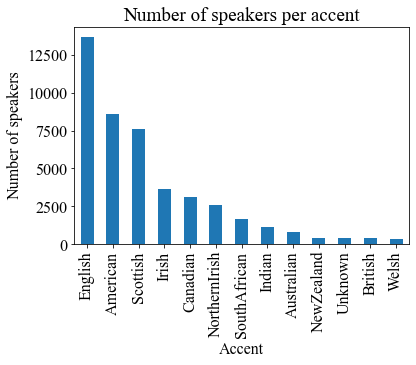

In [16]:
fig, ax = plt.subplots()
fig.figsize=(8,8)
fig.edgecolor='black'
ax.set_xlabel('Accent')
ax.set_ylabel('Number of speakers')
ax.set_title('Number of speakers per accent')
data['speaker_accent'].value_counts().plot(kind='bar')


In [17]:
dictionary = data['speaker_accent'].value_counts()
x = list(dictionary.keys())
p = [dictionary[key] for key in x]
dictionary = test_data['speaker_accent'].value_counts()
q = [dictionary[key] for key in x]
dictionary = val_data['speaker_accent'].value_counts()
r = [dictionary[key] for key in x]

KeyError: 'Irish'

In [18]:
# len(r)

In [19]:
import numpy as np

NameError: name 'q' is not defined

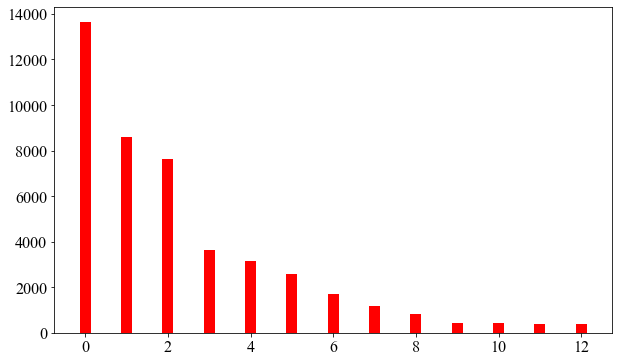

In [20]:
N = 13
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

yvals = p
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = q
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = r
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_title('Number of speakers per accent per set')
ax.set_ylabel('Number of speakers')
ax.set_xlabel('Accents per set')
ax.set_xticks(ind+width)
ax.set_xticklabels( (x) )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Train', 'Test', 'Val') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
plt.xticks(rotation='vertical')
plt.show()

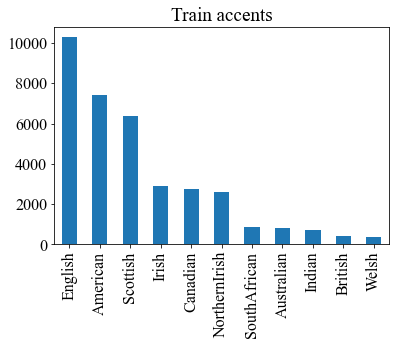

In [21]:
train_data['speaker_accent'].value_counts().plot(kind='bar', title='Train accents')

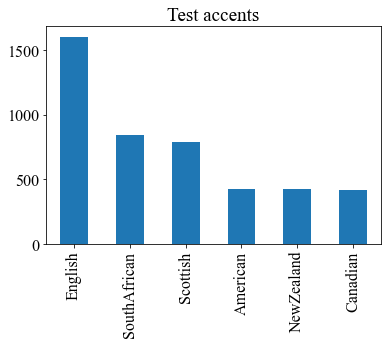

In [22]:
test_data['speaker_accent'].value_counts().plot(kind='bar', title='Test accents')

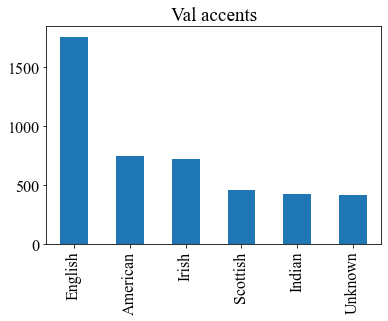

In [23]:
val_data['speaker_accent'].value_counts().plot(kind='bar', title='Val accents')

Text(0, 0.5, 'Gender frequency')

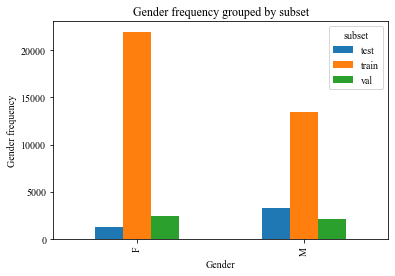

In [24]:
%matplotlib inline
pd.crosstab(data.speaker_gender, data.subset).plot(kind="bar")
plt.title("Gender frequency grouped by subset")
plt.xlabel("Gender")
plt.ylabel("Gender frequency")

Text(0, 0.5, 'Frequency')

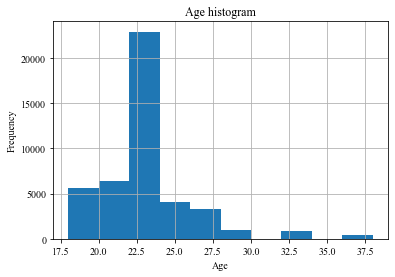

In [25]:
%matplotlib inline
data.speaker_age.hist()
plt.title("Age histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")

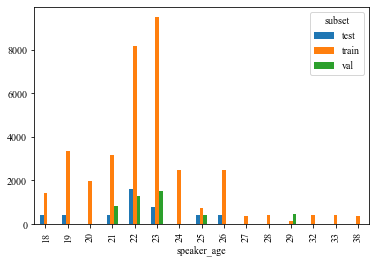

In [26]:
pd.crosstab(data.speaker_age, data.subset).plot(kind="bar")

# For the music:

In [27]:
import json

In [28]:
with open('Jamendo/metadata.json') as file:
    json_file = json.load(file)

In [29]:
keys = list(json_file.keys())
artists = {}
for song_id in keys:
    song = json_file.get(song_id)
    artist_id = song['artist_id']
    if artist_id in artists.keys():
        artists[artist_id].append(song_id)
    else:
        artists[artist_id] = [song_id]

In [30]:
len(artists.keys())

2777

In [31]:
count_dict = {artist:len(artists[artist]) for artist in artists}

In [32]:
{k: v for k, v in sorted(count_dict.items(), key=lambda item: item[1], reverse=True)}

{'14': 233,
 '343607': 191,
 '359034': 186,
 '7907': 177,
 '375935': 158,
 '7872': 143,
 '560': 138,
 '7805': 133,
 '7063': 129,
 '338247': 122,
 '339574': 101,
 '587': 101,
 '2740': 94,
 '341642': 89,
 '2034': 86,
 '353807': 85,
 '3944': 85,
 '338649': 71,
 '357359': 69,
 '4812': 69,
 '3799': 68,
 '336426': 64,
 '3370': 58,
 '1435': 57,
 '332': 57,
 '340121': 57,
 '344353': 57,
 '343767': 55,
 '349976': 55,
 '341323': 54,
 '347734': 53,
 '7561': 53,
 '342904': 53,
 '87': 52,
 '3786': 51,
 '460469': 50,
 '2485': 50,
 '5261': 48,
 '361044': 48,
 '5240': 48,
 '346808': 48,
 '104': 47,
 '5721': 47,
 '8004': 47,
 '339989': 46,
 '348835': 45,
 '876': 44,
 '354648': 43,
 '451073': 42,
 '345952': 42,
 '365833': 42,
 '337939': 42,
 '348064': 41,
 '475967': 41,
 '696': 41,
 '365142': 40,
 '811': 40,
 '4819': 39,
 '441585': 38,
 '2278': 38,
 '438603': 38,
 '2741': 38,
 '350716': 38,
 '8236': 38,
 '341681': 37,
 '341528': 37,
 '702': 37,
 '371777': 36,
 '2208': 36,
 '4056': 36,
 '341226': 35,
 '6

In [33]:
list(set({k: v for k, v in sorted(count_dict.items(), key=lambda item: item[1])}.keys()))[-1]

'433460'

In [34]:
# load music
train_data = pd.read_csv('podcastmix/podcastmix-synth/metadata/train/music.csv')
train_data['subset'] = 'train'
val_data = pd.read_csv('podcastmix/podcastmix-synth/metadata/val/music.csv')
val_data['subset'] = 'val'
test_data = pd.read_csv('podcastmix/podcastmix-synth/metadata/test/music.csv')
test_data['subset'] = 'test'
data_csv = pd.concat([train_data, val_data, test_data], ignore_index = True)
data_csv.head()

,music_ID,jamendo_id,name,artist_name,artist_id,album_name,license_ccurl,releasedate,image,vocalinstrumental,lang,gender,acousticelectric,speed,tags,music_path,length,subset
0,11751,11751,Urban,Tom La Meche,696,Blog,http://creativecommons.org/licenses/by-nc-nd/3.0/,2006-04-22,https://images.jamendo.com/albums/s1/1741/cove...,instrumental,NaN,neutral,electric,medium,"{""genres"": [""jazz""/ ""nujazz""]/ ""instruments"": ...",podcastmix/podcastmix-synth/train/music/11751....,12304128,train
1,5086,5086,Indian Dream,Tom La Meche,696,Personnel,http://creativecommons.org/licenses/by-nc-sa/2.5/,2005-12-02,https://images.jamendo.com/albums/s0/786/cover...,instrumental,NaN,NaN,NaN,medium,"{""genres"": [""jazz""/ ""nujazz""]/ ""instruments"": ...",podcastmix/podcastmix-synth/train/music/5086.flac,10362691,train
2,11750,11750,Eluder,Tom La Meche,696,Blog,http://creativecommons.org/licenses/by-nc-sa/2.5/,2006-04-22,https://images.jamendo.com/albums/s1/1741/cove...,instrumental,NaN,NaN,NaN,medium,"{""genres"": [""jazz""/ ""blues""/ ""nujazz""]/ ""instr...",podcastmix/podcastmix-synth/train/music/11750....,4639844,train
3,5083,5083,Rencontre du 7ième type,Tom La Meche,696,Personnel,http://creativecommons.org/licenses/by-nc-sa/2.5/,2005-12-02,https://images.jamendo.com/albums/s0/786/cover...,instrumental,NaN,neutral,electric,medium,"{""genres"": [""experimental""/ ""electronic""]/ ""in...",podcastmix/podcastmix-synth/train/music/5083.flac,7290629,train
4,48726,48726,Interlude interrompu,Tom La Meche,696,Où se cachent...,http://creativecommons.org/licenses/by-nc-nd/3.0/,2007-06-04,https://images.jamendo.com/albums/s5/5905/cove...,instrumental,NaN,NaN,NaN,medium,"{""genres"": [""jazz""/ ""ambient""]/ ""instruments"":...",podcastmix/podcastmix-synth/train/music/48726....,6036822,train


In [35]:
len(data_csv)

19370

In [36]:
train_data.artist_id.nunique()

2208

In [37]:
test_data.artist_id.nunique()

278

In [38]:
val_data.artist_id.nunique()

277

In [39]:
import json

In [40]:
genres_train_count = {}
vartags_train_count = {}
for i in range(len(train_data)):
    row = train_data.iloc[i]
    tags = json.loads(row["tags"].replace('/',','))
    genres = tags['genres']
    vartags = tags['vartags']
    for genre in genres:
        if genre not in genres_train_count:
            genres_train_count[genre] = 1
        else:
            genres_train_count[genre] += 1
    for vartag in vartags:
        if vartag not in vartags_train_count:
            vartags_train_count[vartag] = 1
        else:
            vartags_train_count[vartag] += 1

print(genres_train_count)
print(vartags_train_count)

{'jazz': 788, 'nujazz': 47, 'blues': 181, 'experimental': 300, 'electronic': 2555, 'ambient': 921, 'chillout': 595, 'jungle': 61, 'funk': 265, 'world': 526, 'latinjazz': 15, 'bossanova': 35, 'folk': 934, 'classical': 899, 'rock': 2873, 'metal': 633, 'indie': 577, 'spacerock': 3, 'alternativerock': 79, 'artrock': 4, 'classicrock': 46, 'newage': 353, 'dance': 558, 'synthpop': 30, 'reggae': 279, 'dub': 75, 'lofi': 16, 'shoegaze': 2, 'indiepop': 33, 'indierock': 82, 'house': 264, 'edm': 46, 'trance': 275, 'pop': 2302, 'soul': 99, 'techno': 278, 'hiphop': 574, 'rap': 173, 'latin': 171, 'filmscore': 940, 'psytrance': 25, 'celtic': 94, 'corporate': 196, 'eurodance': 33, 'rnb': 151, 'samba': 11, 'jazzfunk': 27, 'manouche': 7, 'gypsy': 22, 'synthwave': 13, 'newwave': 12, 'postrock': 48, 'progressiverock': 20, 'drumnbass': 127, 'punk': 232, 'singersongwriter': 345, 'country': 179, 'indietronica': 13, 'symphonic': 41, 'breakbeat': 93, 'bebop': 13, 'heavymetal': 31, 'chillwave': 3, 'electropop': 1

In [41]:
genres_test_count = {}
vartags_test_count = {}
for i in range(len(test_data)):
    row = test_data.iloc[i]
    tags = json.loads(row["tags"].replace('/',','))
    genres = tags['genres']
    vartags = tags['vartags']
    for genre in genres:
        if genre not in genres_test_count:
            genres_test_count[genre] = 1
        else:
            genres_test_count[genre] += 1
    for vartag in vartags:
        if vartag not in vartags_test_count:
            vartags_test_count[vartag] = 1
        else:
            vartags_test_count[vartag] += 1

print(genres_test_count)
print(vartags_test_count)

{'rock': 382, 'latin': 45, 'poprock': 15, 'rocknroll': 9, 'idm': 26, 'house': 16, 'metal': 43, 'electronic': 317, 'dubstep': 8, 'filmscore': 140, 'tribal': 1, 'pop': 405, 'rap': 38, 'folk': 68, 'dance': 80, 'world': 57, 'funk': 16, 'hiphop': 61, 'indie': 138, 'salsa': 14, 'cumbia': 8, 'reggaeton': 2, 'experimental': 16, 'jazz': 32, 'chillout': 36, 'spokenword': 1, 'soul': 39, 'gospel': 1, 'electropop': 22, 'blues': 39, 'newage': 45, 'singersongwriter': 38, 'rnb': 24, 'corporate': 4, 'downtempo': 9, 'classical': 91, 'neoclassical': 4, 'reggae': 43, 'ragga': 4, 'heavymetal': 7, 'punk': 3, 'ambient': 62, 'oriental': 3, 'deathmetal': 4, 'middleeastern': 2, 'jungle': 4, 'bossanova': 2, 'dreampop': 9, 'electrorock': 6, 'indierock': 12, 'alternativehiphop': 1, 'triphop': 28, 'darkwave': 20, 'trance': 49, 'techno': 22, 'chansonfrancaise': 9, 'darkambient': 5, 'chillwave': 1, 'electrohouse': 1, 'disco': 3, 'celtic': 4, 'swing': 6, 'classicrock': 8, 'alternativerock': 4, '8bit': 20, 'acidjazz': 

In [42]:
genres_val_count = {}
vartags_val_count = {}
for i in range(len(val_data)):
    row = val_data.iloc[i]
    tags = json.loads(row["tags"].replace('/',','))
    genres = tags['genres']
    vartags = tags['vartags']
    for genre in genres:
        if genre not in genres_val_count:
            genres_val_count[genre] = 1
        else:
            genres_val_count[genre] += 1
    for vartag in vartags:
        if vartag not in vartags_val_count:
            vartags_val_count[vartag] = 1
        else:
            vartags_val_count[vartag] += 1

print(genres_val_count)
print(vartags_val_count)

{'classical': 112, 'electronic': 340, 'filmscore': 248, 'newage': 83, 'chillout': 86, 'idm': 6, 'drumnbass': 13, 'neoclassical': 2, 'pop': 266, 'rock': 333, 'country': 16, 'downtempo': 32, 'triphop': 23, 'jazz': 69, 'oriental': 5, 'singersongwriter': 31, 'folk': 44, 'indiepop': 16, 'trance': 26, 'world': 49, 'tribal': 4, 'ambient': 136, 'reggae': 48, 'dubstep': 8, 'experimental': 22, 'spokenword': 3, 'chansonfrancaise': 2, 'indie': 110, 'hiphop': 107, 'nujazz': 8, 'acidjazz': 4, 'latin': 20, 'loop': 1, 'production': 3, 'metal': 43, 'alternativemetal': 1, 'ragga': 12, 'soul': 6, 'funk': 24, 'rnb': 25, 'darkwave': 1, 'electronica': 5, 'industrial': 1, 'surfrock': 2, 'rocknroll': 3, 'garage': 2, 'alternativerock': 7, 'blues': 26, 'swing': 9, 'rap': 48, 'techno': 20, 'punk': 13, 'chamber': 1, 'dance': 44, 'house': 21, 'disco': 3, 'trap': 1, 'gothic': 8, 'shoegaze': 8, 'postrock': 7, 'deathmetal': 7, 'reggaeton': 2, 'indierock': 9, 'synthpop': 3, 'flamenco': 2, 'bossanova': 3, 'psychedelicr

In [43]:
genres_train_count = {}
vartags_train_count = {}
for i in range(len(data_csv)):
    row = data_csv.iloc[i]
    tags = json.loads(row["tags"].replace('/',','))
    genres = tags['genres']
    vartags = tags['vartags']
    for genre in genres:
        if genre not in genres_train_count:
            genres_train_count[genre] = 1
        else:
            genres_train_count[genre] += 1
    for vartag in vartags:
        if vartag not in vartags_train_count:
            vartags_train_count[vartag] = 1
        else:
            vartags_train_count[vartag] += 1

print(genres_train_count)
print(vartags_train_count)

{'jazz': 889, 'nujazz': 56, 'blues': 246, 'experimental': 338, 'electronic': 3212, 'ambient': 1119, 'chillout': 717, 'jungle': 66, 'funk': 305, 'world': 632, 'latinjazz': 17, 'bossanova': 40, 'folk': 1046, 'classical': 1102, 'rock': 3588, 'metal': 719, 'indie': 825, 'spacerock': 3, 'alternativerock': 90, 'artrock': 4, 'classicrock': 56, 'newage': 481, 'dance': 682, 'synthpop': 49, 'reggae': 370, 'dub': 94, 'lofi': 17, 'shoegaze': 15, 'indiepop': 68, 'indierock': 103, 'house': 301, 'edm': 51, 'trance': 350, 'pop': 2973, 'soul': 144, 'techno': 320, 'hiphop': 742, 'rap': 259, 'latin': 236, 'filmscore': 1328, 'psytrance': 25, 'celtic': 100, 'corporate': 202, 'eurodance': 35, 'rnb': 200, 'samba': 13, 'jazzfunk': 29, 'manouche': 8, 'gypsy': 24, 'synthwave': 13, 'newwave': 37, 'postrock': 57, 'progressiverock': 24, 'drumnbass': 142, 'punk': 248, 'singersongwriter': 414, 'country': 210, 'indietronica': 13, 'symphonic': 101, 'breakbeat': 106, 'bebop': 13, 'heavymetal': 41, 'chillwave': 4, 'elec

In [44]:
import operator

In [45]:
sorted_test_genres = dict( sorted(genres_test_count.items(), key=operator.itemgetter(1),reverse=True))
sorted_test_vartags = dict( sorted(vartags_test_count.items(), key=operator.itemgetter(1),reverse=True))
sorted_train_genres = dict( sorted(genres_train_count.items(), key=operator.itemgetter(1),reverse=True))
sorted_train_vartags = dict( sorted(vartags_train_count.items(), key=operator.itemgetter(1),reverse=True))
sorted_val_genres = dict( sorted(genres_val_count.items(), key=operator.itemgetter(1),reverse=True))
sorted_val_vartags = dict( sorted(vartags_val_count.items(), key=operator.itemgetter(1),reverse=True))

In [46]:
x = list(sorted_train_genres.keys())[0:20]
p = [sorted_train_genres[key] for key in x]
q = [sorted_test_genres[key] for key in x]
r = [sorted_val_genres[key] for key in x]

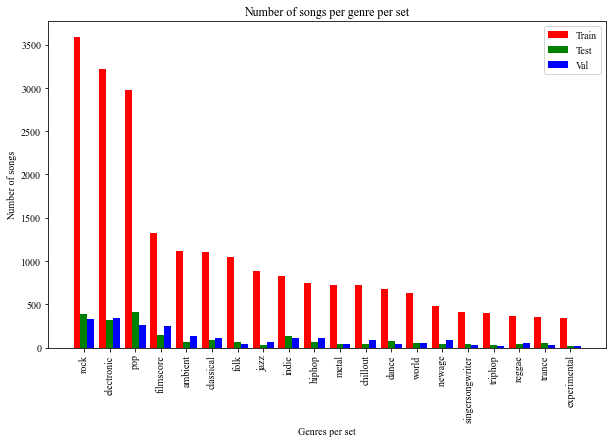

In [47]:
N = 20
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

yvals = p
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = q
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = r
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_title('Number of songs per genre per set')
ax.set_ylabel('Number of songs')
ax.set_xlabel('Genres per set')
ax.set_xticks(ind+width)
ax.set_xticklabels( (x) )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Train', 'Test', 'Val') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
plt.xticks(rotation='vertical')
plt.show()

In [48]:
x = list(sorted_train_vartags.keys())[0:20]
p = [sorted_train_vartags[key] for key in x]
q = [sorted_test_vartags[key] for key in x]
r = [sorted_val_vartags[key] for key in x]

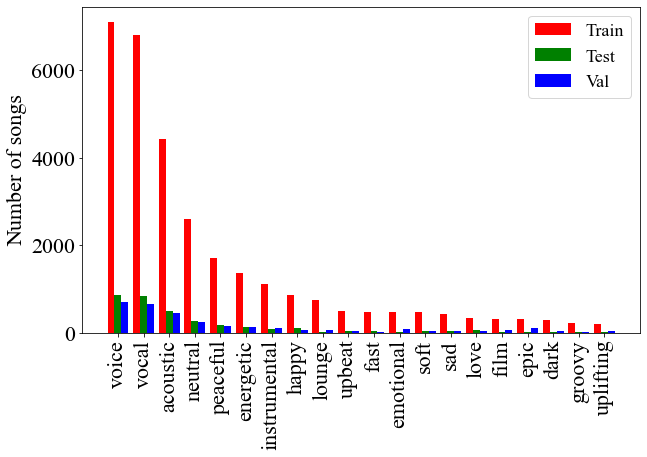

In [56]:
N = 20
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

yvals = p
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = q
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = r
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

# ax.set_title('Number of songs per vartag per set')
ax.set_ylabel('Number of songs', fontsize=22)
# ax.set_xlabel('Vartags per set')
ax.set_xticks(ind+width)
ax.set_xticklabels( (x) )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Train', 'Test', 'Val'),prop={"size":18} )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
plt.xticks(rotation='vertical')
plt.rcParams['font.size'] = '22'
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.show()

In [78]:
plt.bar(list(sorted_vartags.keys())[0:max_genres], list(sorted_vartags.values())[0:max_genres])
plt.xticks(rotation='vertical')

NameError: name 'sorted_vartags' is not defined

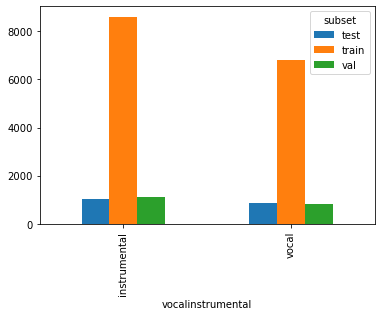

In [20]:
pd.crosstab(data_csv.vocalinstrumental, data_csv.subset).plot(kind="bar")

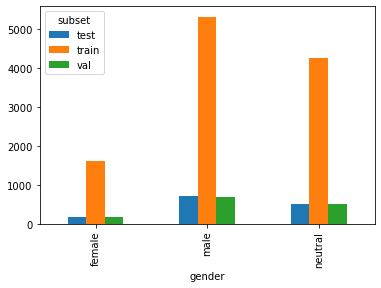

In [21]:
pd.crosstab(data_csv.gender, data_csv.subset).plot(kind="bar")

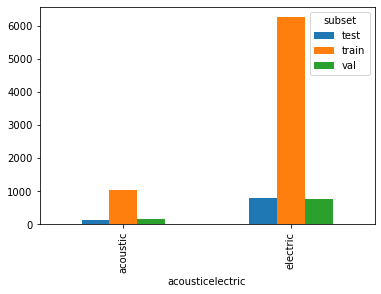

In [22]:
pd.crosstab(data_csv.acousticelectric, data_csv.subset).plot(kind="bar")

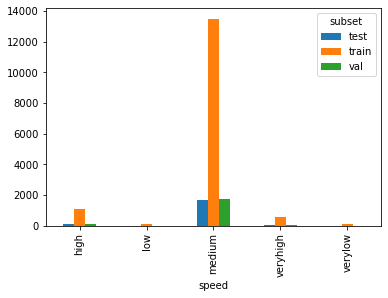

In [23]:
pd.crosstab(data_csv.speed, data_csv.subset).plot(kind="bar")

In [26]:
len(val_data)

1937

In [2]:
metrics = pd.read_csv('../../Downloads/experiments-defense-epochs/ConvTasNet_model/exp-92-epochs-LogL1/tmp/ConvTasNet_model/eval/tmp/all_metrics.csv')

In [3]:
import matplotlib.pyplot as plt    

In [4]:
without_index = metrics.drop(['Unnamed: 0'], axis=1)

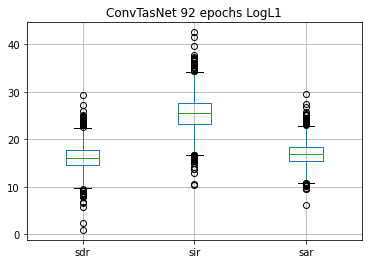

In [7]:
axes = without_index.boxplot(column=['sdr', 'sir', 'sar'])
title_boxplot = 'ConvTasNet 92 epochs LogL1'
plt.title( title_boxplot )
plt.show()

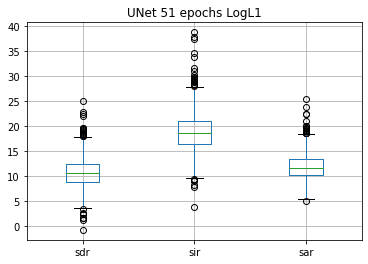

In [8]:
metrics = pd.read_csv('../../Desktop/exp-44100-51-e-LogL2/UNet_model/exp-44100-51-e-LogL2/tmp/UNet_model/eval/tmp/all_metrics.csv')
without_index = metrics.drop(['Unnamed: 0'], axis=1)
without_index.boxplot(column=['sdr', 'sir', 'sar'])
title_boxplot = 'UNet 51 epochs LogL1'
plt.title( title_boxplot )
plt.show()

In [71]:
without_index["sdr"]>18

0       False
1       False
2       False
3       False
4       False
        ...  
1932    False
1933    False
1934    False
1935    False
1936    False
Name: sdr, Length: 1937, dtype: bool

In [72]:
metrics

,Unnamed: 0,input_si_sdr,input_sdr,input_sir,input_sar,input_stoi,si_sdr,sdr,sir,sar,stoi
0,0,0.047440,0.078760,0.078760,152.945241,0.633346,12.902286,13.443705,21.619584,14.195148,0.844430
1,1,-0.080529,-0.051287,-0.051287,152.369325,0.663587,14.986272,15.317878,24.992563,15.897885,0.657941
2,2,0.030053,0.055214,0.055214,152.658040,0.707160,11.419689,12.174802,18.860195,13.286260,0.810261
3,3,-0.003112,0.007539,0.007539,152.839531,0.570262,12.879701,13.178356,23.780115,13.643451,0.668016
4,4,0.294288,0.796949,0.796949,151.785503,0.612120,5.157646,7.263264,15.786073,11.433932,0.580975
...,...,...,...,...,...,...,...,...,...,...,...
1932,1932,-0.013608,0.034553,0.034553,152.200640,0.559282,12.923563,13.123399,23.161099,13.604595,0.682884
1933,1933,0.131602,0.190430,0.190430,151.875353,0.605793,11.486515,12.124985,19.377347,13.124973,0.757391
1934,1934,-0.113163,-0.090300,-0.090300,152.243809,0.625846,7.924043,8.958798,15.010290,10.741752,0.758234
1935,1935,0.100544,0.136763,0.136763,152.594378,0.706906,5.974904,6.663296,13.175760,8.237348,0.715374


In [73]:
import numpy as np

In [74]:
df = pd.DataFrame(np.random.randn(10000, 3),
                  columns=['Col1', 'Col2', 'Col3'])

In [75]:
df

,Col1,Col2,Col3
0,0.397668,-0.875097,0.120277
1,1.869511,-1.491615,-1.065536
2,0.777149,0.616518,0.860068
3,1.146586,0.924310,-1.037584
4,0.094283,0.645252,-0.175847
...,...,...,...
9995,0.609031,-0.404769,-1.129228
9996,-0.766866,0.154695,-1.507295
9997,0.793994,0.182377,-1.875492
9998,1.641159,-0.688853,0.146205


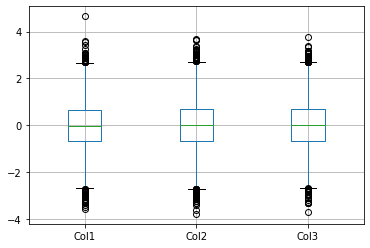

In [76]:
df.boxplot()